# Kaggle Dataset link - 'https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset'

In [1]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompat

# **Import Modules**

In [2]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **Load The Data**

In [3]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train'

emotion_classes = [d for d in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, d))]

print(f'Emotion Classes:', emotion_classes)


Emotion Classes: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [4]:
# emotion_classes = []

# for d in os.listdir(TRAIN_DIR):
#     full_path = os.path.join(TRAIN_DIR, d)
#     if os.path.isdir(full_path):
#         emotion_classes.append(d)

# /kaggle/input/face-expression-recognition-dataset/images/train + /happy

# **Data Preprocessing**

In [5]:
emotion_classes = ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    #shear_range=0.0,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale = 1./255)

# Data Generators 

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/face-expression-recognition-dataset/images/train',
    target_size = (48, 48),
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle=True,
    classes=emotion_classes,
    class_mode= 'sparse'
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/face-expression-recognition-dataset/images/validation',
    target_size = (48, 48),
    color_mode = 'grayscale',
    batch_size = 32,
    shuffle=False,
    classes=emotion_classes,
    class_mode= 'sparse'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
class_names = list(train_generator.class_indices.keys())
NUM_CLASSES = train_generator.num_classes

print("Classes:", class_names)
print("Number of classes:", NUM_CLASSES)

Classes: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Number of classes: 7


In [7]:
print(train_generator.class_indices)

{'surprise': 0, 'fear': 1, 'angry': 2, 'neutral': 3, 'sad': 4, 'disgust': 5, 'happy': 6}


# **EDA (Visualize Sample Images)**

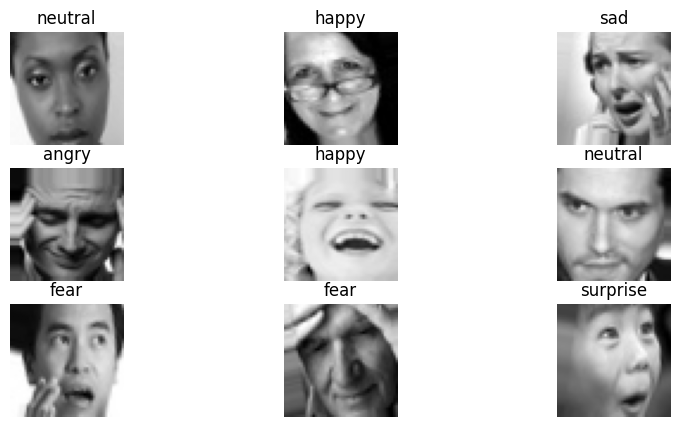

In [8]:
for images, labels in train_generator:
    plt.figure(figsize=(10, 5))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img = images[i]
        plt.imshow(img, cmap = 'gray')

        true_index = int(labels[i])
        true_label = class_names[true_index]
        plt.title(true_label)
        plt.axis('off')
    break

plt.show()

# **Model Building**

In [9]:
# Build CNN Model 

model = Sequential([
    
    Conv2D(32, kernel_size= (3,3), activation='relu', input_shape = (48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # Dense Layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation="softmax") 
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1768918421.061404      24 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768918421.062112      24 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,015 (2.36 MB)

 Trainable params: 619,015 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
  1/901 ━━━━━━━━━━━━━━━━━━━━ 1:15:43 5s/step - accuracy: 0.0938 - loss: 1.9543

I0000 00:00:1768918427.450555      93 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


901/901 ━━━━━━━━━━━━━━━━━━━━ 206s 224ms/step - accuracy: 0.2410 - loss: 1.8150 - val_accuracy: 0.3408 - val_loss: 1.6759
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.3189 - loss: 1.6974 - val_accuracy: 0.4315 - val_loss: 1.4937
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.3727 - loss: 1.5975 - val_accuracy: 0.4615 - val_loss: 1.4094
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.4165 - loss: 1.5068 - val_accuracy: 0.5057 - val_loss: 1.3196
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.4382 - loss: 1.4552 - val_accuracy: 0.5132 - val_loss: 1.2805
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.4586 - loss: 1.4177 - val_accuracy: 0.5202 - val_loss: 1.2569
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4731 - loss: 1.3820 - val_accuracy: 0.5354 - val_loss: 1.2238
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.4789 - loss: 1.3630 - val_accur

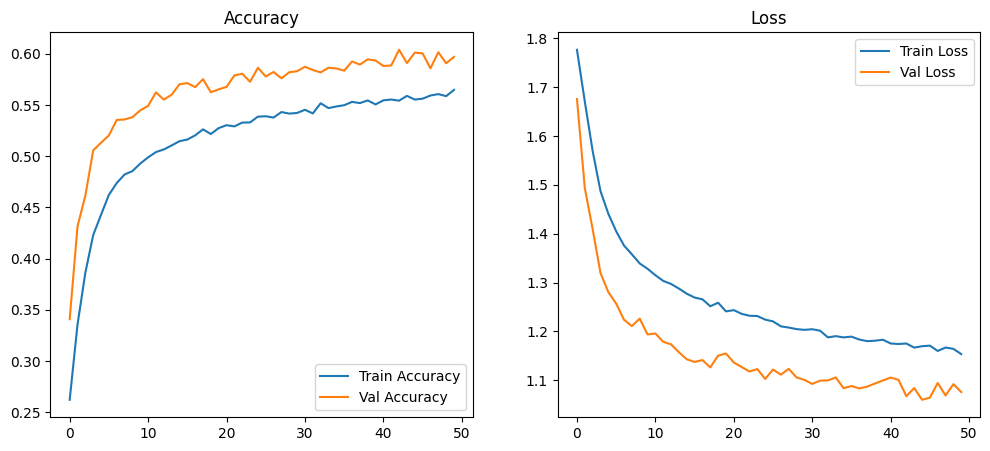

In [11]:
# Plot Accuracy & Loss

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(acc, label="Train Accuracy")
plt.plot(val_acc, label="Val Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()


# **Model Evaluation**

In [12]:
# test_loss, test_acc = cnn_model.evaluate(test_generator)
# print(f"Test Accuracy: {test_acc*100:.2f}%")


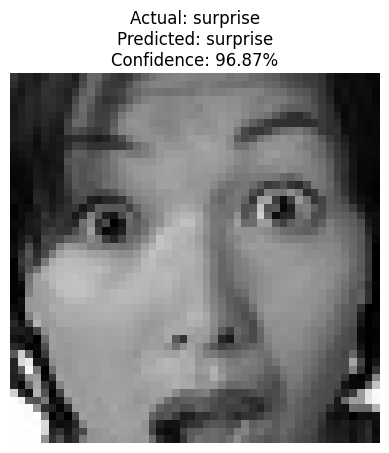

In [13]:
# Predict ONE random test image (Correct for Emotion)

for images, labels in val_generator:
    img = images[0]

    # True label (sparse)
    true_index = int(labels[0])
    true_label = class_names[true_index]

    # Prediction
    preds = model.predict(np.expand_dims(img, axis=0), verbose=0)[0]  
    # preds shape = (NUM_CLASSES,)

    pred_index = np.argmax(preds)     # ✅ correct for multi-class
    pred_label = class_names[pred_index]
    confidence = preds[pred_index] * 100

    # Show
    plt.imshow(img, cmap='gray')
    plt.title(
        f"Actual: {true_label}\n"
        f"Predicted: {pred_label}\n"
        f"Confidence: {confidence:.2f}%"
    )
    plt.axis("off")
    break


# **Multiple Predictions with Confidence (CNN + SPARSE)**

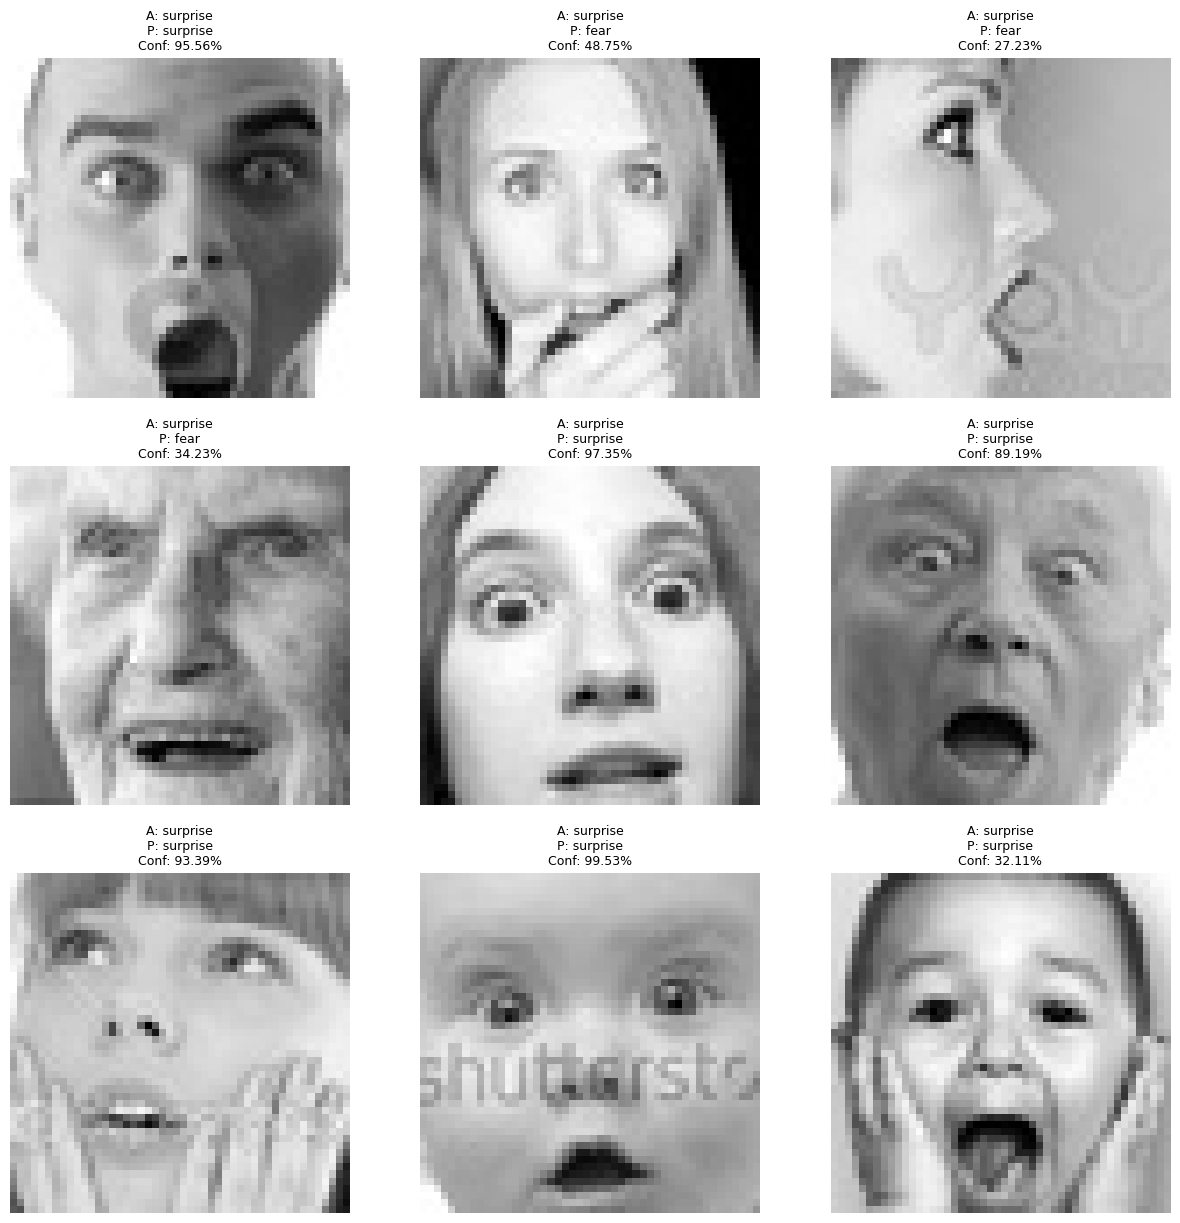

In [14]:
plt.figure(figsize=(15,15))

for images, labels in val_generator:
    for i in range(9):
        img = images[i]

        # True label (sparse)
        true_index = int(labels[i])
        true_label = class_names[true_index]

        # Prediction
        preds = model.predict(np.expand_dims(img, axis=0), verbose=0)[0]
        pred_index = np.argmax(preds)
        pred_label = class_names[pred_index]
        confidence = preds[pred_index] * 100

        # Plot
        plt.subplot(3,3,i+1)
        plt.imshow(img, cmap='gray')
        plt.title(
            f"A: {true_label}\n"
            f"P: {pred_label}\n"
            f"Conf: {confidence:.2f}%",
            fontsize=9
        )
        plt.axis("off")

    break

plt.show()


# **External Image Test (CNN + Sparse)**

In [15]:
# Load image data using array

# from tensorflow.keras.preprocessing import image

# img_path = "/content/test_emotion.jpg"   # change path

# # Load & preprocess
# img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale")
# #img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
# img_array = image.img_to_array(img) / 255.0  # shape (H, W, 1)
# img_array = np.expand_dims(img_array, axis=0)

# # Predict
# preds = model.predict(img_array, verbose=0)[0]

# pred_index = np.argmax(preds)
# predicted_label = class_names[pred_index]
# confidence = preds[pred_index] * 100

# # Show result
# plt.imshow(img, cmap="gray")
# plt.axis("off")
# plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
# plt.show()


In [16]:
# **External Image Test (CNN + Sparse)** -- CV2 Method

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# img_path = "/content/test_emotion.jpg"   # change path

# # Load image in grayscale
# img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# # Resize
# img_gray = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

# # Normalize
# img_array = img_gray.astype("float32") / 255.0

# # Add channel dimension (H, W, 1)
# img_array = np.expand_dims(img_array, axis=-1)

# # Add batch dimension (1, H, W, 1)
# img_array = np.expand_dims(img_array, axis=0)

# # Predict
# preds = cnn_model.predict(img_array, verbose=0)[0]

# pred_index = np.argmax(preds)
# predicted_label = class_names[pred_index]
# confidence = preds[pred_index] * 100

# # Show result
# plt.imshow(img_gray, cmap="gray")
# plt.axis("off")
# plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
# plt.show()

In [17]:
# model.save("emotion_cnn_sparse_model.h5")
# print("✅ CNN sparse model saved successfully!")


# Compare Binary vs Multi-Class (Very Important Table)

| Case        | Model Output                     | How to get confidence |
| ----------- | -------------------------------- | --------------------- |
| Binary      | Single scalar `prob = P(class1)` | `prob` or `1-prob`    |
| Multi-class | Vector `[p0, p1, ..., pN]`       | `preds[pred_index]`   |

- Multiclass means categorical, sparse

| Model Type                     | Output Shape     | Use `preds[pred_index]`? |
| ------------------------------ | ---------------- | ------------------------ |
| Binary (sigmoid, 1 unit)       | `(1,)` or scalar | ❌ NO                     |
| Categorical (softmax, N units) | `(N,)`           | ✅ YES                    |


# Side-by-Side Comparison (Very Important)

| Aspect           | Grayscale CNN     | Color VGG16      |
| ---------------- | ----------------- | ---------------- |
| Crop from        | `gray[...]`       | `frame[...]`     |
| Channels         | 1                 | 3                |
| Input shape      | `(H, W, 1)`       | `(H, W, 3)`      |
| Color conversion | ❌ Not needed      | ✅ Required       |
| Why              | Already grayscale | BGR → RGB needed |


## If you train your custom CNN on colorful (RGB) images, then in webcam inference you MUST use:

```
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

In [18]:
# WEBCAM CODE — CUSTOM CNN (GRAYSCALE, SPARSE)

# import cv2
# import numpy as np
# import tensorflow as tf

# # ==========================
# # Load Haar Cascade
# # ==========================
# face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# # ==========================
# # Load Trained CNN Model
# # ==========================
# IMG_SIZE = 48   # must match training
# MODEL_PATH = "emotion_cnn_sparse_model.h5"

# model = tf.keras.models.load_model(MODEL_PATH)
# print("✅ Grayscale CNN emotion model loaded")

# # ==========================
# # Class Names (MUST match training order)
# # ==========================
# class_names = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# # ==========================
# # Start Webcam
# # ==========================
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert full frame to grayscale (for face detection + model)
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces on grayscale frame
#     faces = face_cascade.detectMultiScale(
#         gray,
#         scaleFactor=1.1,
#         minNeighbors=5,
#         minSize=(80, 80)
#     )

#     for (x, y, w, h) in faces:

#         # --------------------
#         # Crop face (grayscale)
#         # --------------------
#         face_gray = gray[y:y+h, x:x+w]

#         if face_gray.size == 0:
#             continue

#         # --------------------
#         # Preprocess for CNN
#         # --------------------
#         face_gray = cv2.resize(face_gray, (IMG_SIZE, IMG_SIZE))

#         # Normalize
#         face_array = face_gray.astype("float32") / 255.0

#         # Add channel dimension -> (H, W, 1)
#         face_array = np.expand_dims(face_array, axis=-1)

#         # Add batch dimension -> (1, H, W, 1)
#         face_array = np.expand_dims(face_array, axis=0)

#         # --------------------
#         # Predict Emotion
#         # --------------------
#         preds = model.predict(face_array, verbose=0)[0]
#         pred_index = np.argmax(preds)
#         confidence = preds[pred_index] * 100
#         label = class_names[pred_index]

#         text = f"{label} ({confidence:.2f}%)"

#         # --------------------
#         # Draw Results
#         # --------------------
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

#         cv2.putText(
#             frame,
#             text,
#             (x, y - 10),
#             cv2.FONT_HERSHEY_SIMPLEX,
#             0.8,
#             (0, 255, 0),
#             2
#         )

#     cv2.imshow("Emotion Detection (CNN Grayscale)", frame)

#     # ESC to exit
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()
